# **Notebook Exploración de Datos (EDA)**

Leeremos el archivo: EgresosAgo2015.xls
Ubicado en: https://github.com/Joselota/Relatorias/blob/main/Python/Salud/EgresosAgo2015.xls

In [2]:
import pandas as pd

# Si el archivo está en la misma carpeta del notebook
ruta = "EgresosAgo2015.xls"

# Para .xls, pandas necesita el motor xlrd
df = pd.read_excel(ruta, sheet_name=0, engine="xlrd")

# Reviso rápido
df.head()


,Unnamed: 0,EGRESOS SEGÚN SERVICIOS AGOSTO 2015,Unnamed: 2
0,NaN,SERVICIOS,TOTAL
1,NaN,NaN,NaN
2,NaN,MEDICINA INTERNA,399
3,NaN,CIRUGIA ADULTOS,301
4,NaN,CIRUGIA CARDIOVASCULAR,105


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             0 non-null      float64
 1   EGRESOS SEGÚN SERVICIOS  AGOSTO  2015  29 non-null     object 
 2   Unnamed: 2                             29 non-null     object 
dtypes: float64(1), object(2)
memory usage: 900.0+ bytes


In [5]:
df.shape

(32, 3)

In [7]:
# Ver las primeras 15 filas tal cual llegan
df.head(32)

,Unnamed: 0,EGRESOS SEGÚN SERVICIOS AGOSTO 2015,Unnamed: 2
0,NaN,SERVICIOS,TOTAL
1,NaN,NaN,NaN
2,NaN,MEDICINA INTERNA,399
3,NaN,CIRUGIA ADULTOS,301
4,NaN,CIRUGIA CARDIOVASCULAR,105
5,NaN,TRAUMATOLOGIA Y ORTOPEDIA,174
6,NaN,SQP,118
7,NaN,CUIDADO MINIMO,6
8,NaN,LACTANTE INDIFERENCIADO,95
9,NaN,SEGUNDA INFANCIA,80


In [9]:
# 1) descarto la primera columna vacía
tmp = df.iloc[:, 1:]

# 2) elimino filas donde el campo de servicio está vacío o es 'SERVICIOS'
tmp = tmp[tmp.iloc[:, 0].notna() & (tmp.iloc[:, 0] != "SERVICIOS")]

# 3) renombro por claridad
tmp.columns = ["servicio", "total"]

tmp.head(32)

,servicio,total
2,MEDICINA INTERNA,399
3,CIRUGIA ADULTOS,301
4,CIRUGIA CARDIOVASCULAR,105
5,TRAUMATOLOGIA Y ORTOPEDIA,174
6,SQP,118
7,CUIDADO MINIMO,6
8,LACTANTE INDIFERENCIADO,95
9,SEGUNDA INFANCIA,80
10,INFECCIOSOS,27
11,OBSTETRICIA,271


In [10]:
tmp.shape

(28, 2)

In [11]:
tmp.dtypes


,0
servicio,object
total,object


In [14]:
# Convierte la columna 'total' a string para trabajarla cómodamente
tmp["total"] = tmp["total"].astype(str)

# Veamos un par de ejemplos para confirmar
tmp["total"].head()

,total
2,399
3,301
4,105
5,174
6,118


In [15]:
# ¿Hay algo distinto de dígitos en algún registro?
no_digits = tmp["total"].str.contains(r"\D")
print("Filas con caracteres no numéricos:", no_digits.sum())

Filas con caracteres no numéricos: 0


In [17]:
# Si la cuenta anterior es 0, convertimos directo:
tmp["total"] = pd.to_numeric(tmp["total"], errors="coerce")

tmp["total"].head()

,total
2,399
3,301
4,105
5,174
6,118


In [18]:
#micro chequeo
tmp["total"].isna().sum()


np.int64(0)

In [19]:
#Resumen rapido
tmp["total"].describe()


,total
count,28.000000
mean,134.142857
std,356.413380
min,0.000000
25%,8.500000
50%,21.000000
75%,97.500000
max,1878.000000


In [20]:
#Top5
(
    tmp.sort_values("total", ascending=False)
       .head(5)
)


,servicio,total
31,T O T A L E S,1878
2,MEDICINA INTERNA,399
3,CIRUGIA ADULTOS,301
11,OBSTETRICIA,271
5,TRAUMATOLOGIA Y ORTOPEDIA,174


In [24]:
#Calcular la suma SIN la fila “TOTALES”
# 1. Creamos un subconjunto que excluya la fila donde servicio es 'TOTALES'
sin_totales = tmp[tmp["servicio"].str.strip().str.upper() != "T  O  T  A  L  E  S"]

# 2. Sumamos la columna 'total' en ese subconjunto
suma_servicios = sin_totales["total"].sum()

suma_servicios

np.int64(1878)

In [27]:
#quitando la fila TOTALES
# Creamos la misma versión "sin espacios" que usamos antes
clean_servicio = (
    tmp["servicio"]
        .astype(str)
        .str.replace(r"\s+", "", regex=True)  # quita todos los espacios
        .str.upper()
)

# Filtramos todo lo que NO sea 'TOTALES'
df_limpio = tmp[clean_servicio != "TOTALES"].reset_index(drop=True)

# Comprueba rápido
df_limpio.tail()      # la fila de totales ya no debería aparecer
df_limpio.shape       # 27 filas, 2 columnas


(27, 2)

In [28]:
top5 = (
    df_limpio
        .sort_values("total", ascending=False)   # ordena de mayor a menor
        .head(5)                                # toma solo los primeros 5
)

top5


,servicio,total
0,MEDICINA INTERNA,399
1,CIRUGIA ADULTOS,301
9,OBSTETRICIA,271
3,TRAUMATOLOGIA Y ORTOPEDIA,174
4,SQP,118


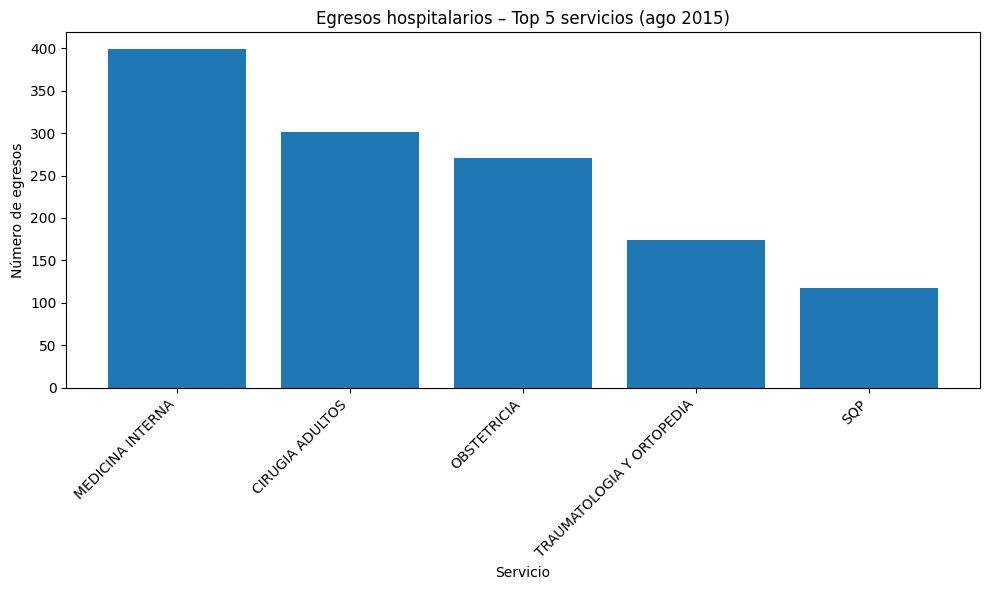

In [29]:
import matplotlib.pyplot as plt

# --- Datos: usamos el DataFrame 'top5' que ya construimos ---
servicios = top5["servicio"]
valores    = top5["total"]

# --- Gráfico ---
plt.figure(figsize=(10, 6))
plt.bar(servicios, valores)          # barras verticales
plt.title("Egresos hospitalarios – Top 5 servicios (ago 2015)")
plt.xlabel("Servicio")
plt.ylabel("Número de egresos")
plt.xticks(rotation=45, ha="right")  # inclina etiquetas para que no se encimen
plt.tight_layout()                   # ajusta márgenes
plt.show()


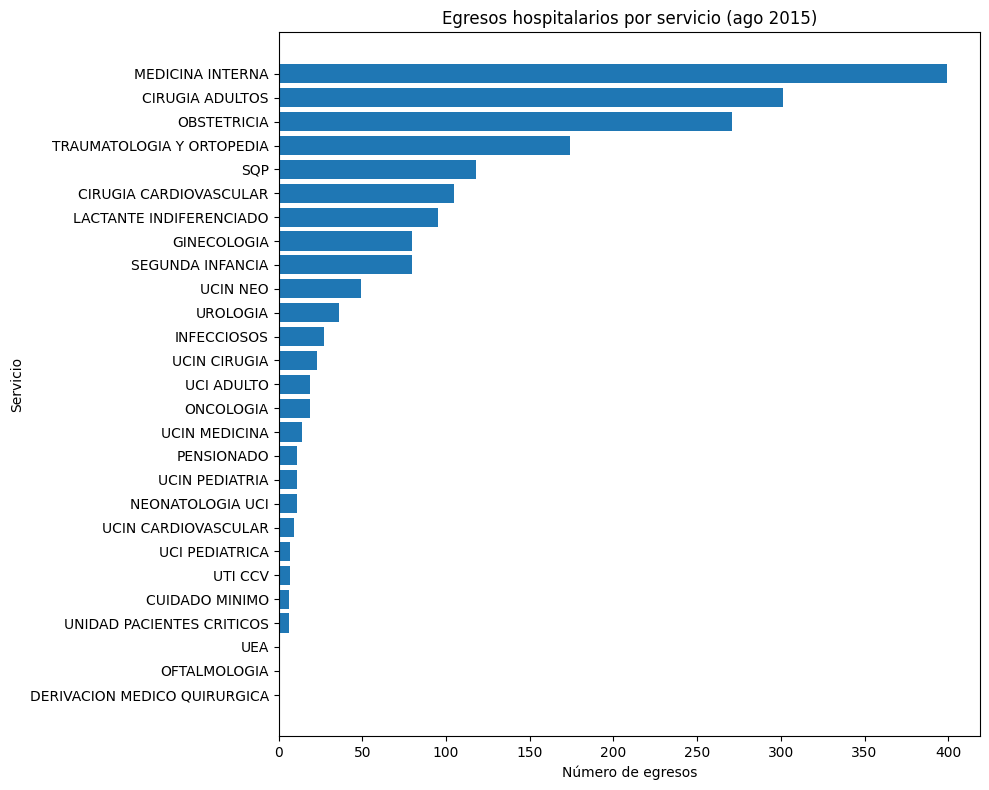

In [30]:
import matplotlib.pyplot as plt

# Ordenamos por desc. y extraemos columnas
ordenado = (
    df_limpio
        .sort_values("total", ascending=False)
        .reset_index(drop=True)
)

plt.figure(figsize=(10, 8))            # ajusta alto si ves etiquetas muy apretadas
plt.barh(ordenado["servicio"], ordenado["total"])
plt.title("Egresos hospitalarios por servicio (ago 2015)")
plt.xlabel("Número de egresos")
plt.ylabel("Servicio")
plt.gca().invert_yaxis()               # invierte para que el mayor quede arriba
plt.tight_layout()
plt.show()


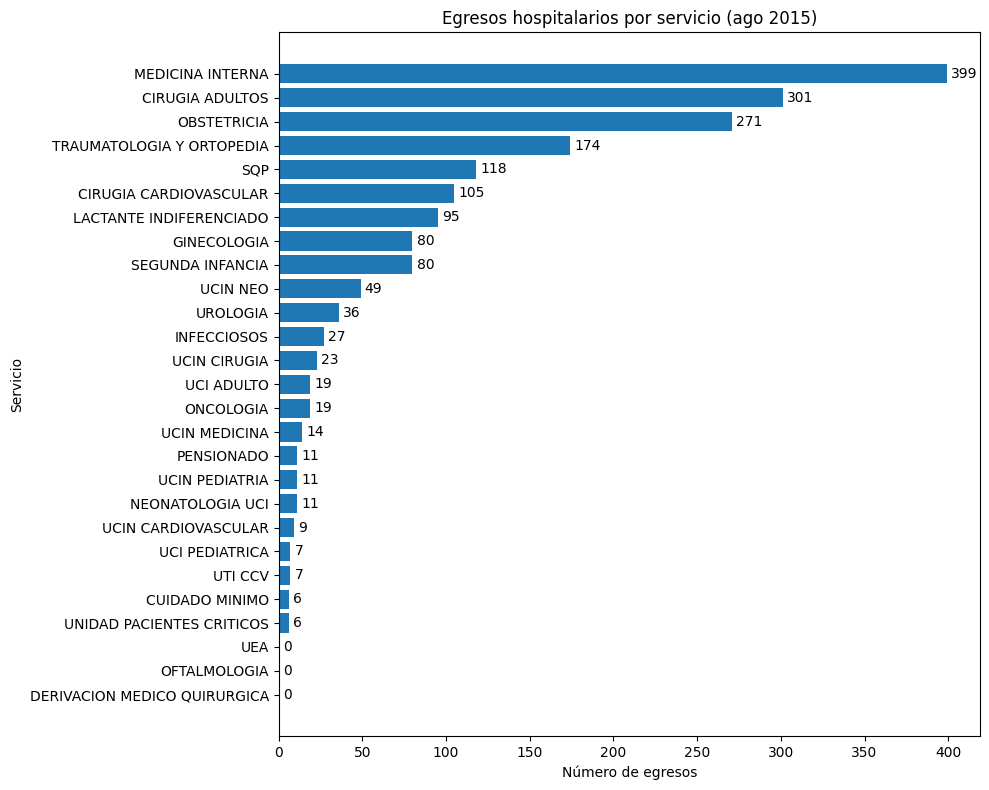

In [31]:
import matplotlib.pyplot as plt

ordenado = (
    df_limpio
        .sort_values("total", ascending=False)
        .reset_index(drop=True)
)

fig, ax = plt.subplots(figsize=(10, 8))
barras = ax.barh(ordenado["servicio"], ordenado["total"])

# 👇 aquí está la magia
ax.bar_label(barras, fmt='%d', padding=3)   # ‘%d’ → número entero

ax.set_title("Egresos hospitalarios por servicio (ago 2015)")
ax.set_xlabel("Número de egresos")
ax.set_ylabel("Servicio")
ax.invert_yaxis()          # mayor arriba
plt.tight_layout()
plt.show()
